# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 5.6.2 Inverse Filtering
---

**Import modules**

In [1]:
%matplotlib inline

import numpy as np

import numpy.matlib

from matplotlib import pyplot as plt

import h5py

import sys

**Load the data**

In [2]:
f = h5py.File('ICEYE_SLC.h5', 'r')

**Form complex image data**

In [3]:
s = f['s_i'][:] + 1j * f['s_q'][:]

s = s.T

**Set the dynamic range for the image (dB)**

In [4]:
dynamic_range = 75

**Get the data size and calculate the image ratio**

In [5]:
nx, ny = s.shape

ratio = ny/nx

**Set the offset from image center**

In [6]:
offset_x = 0
offset_y = 0

xc = np.round(nx/2) - offset_x
yc = np.round(ny/2) - offset_y

# OR - specify a span / or fixed aspect

xs = 500
ys = 1500
# ys = np.round(ratio * xs)

# OR - Use the full image
# xs = nx/2-1
# ys = ny/2-1

index_x = [xc - xs, xc + xs]
index_y = [yc - ys, yc + ys]

# OR - Specific region
index_x = [1000, 3001]
index_y = [1, 8000]

xs = np.round( (index_x[1] - index_x[0]) / 2)
ys = np.round( (index_y[1] - index_y[0]) / 2)

#**Extract desired image area**
s = s[int(index_x[0]-1):int(index_x[1]), int(index_y[0]-1):int(index_y[1])]

nx, ny = s.shape

**Calculate the phase error**

In [7]:
t = np.linspace(-1.3, 0.5, int(nx))

phi = 10 * (4 * t**3 + 6 * t**2)

**Calculate the phase error term**

In [8]:
phase_term = np.outer(np.exp(1j * phi.T), np.ones(ny))

sf = np.fft.fftshift(np.fft.fft(s, axis=0), 0)

s_e = np.fft.ifft(phase_term * sf, axis=0)

**Display the original image**

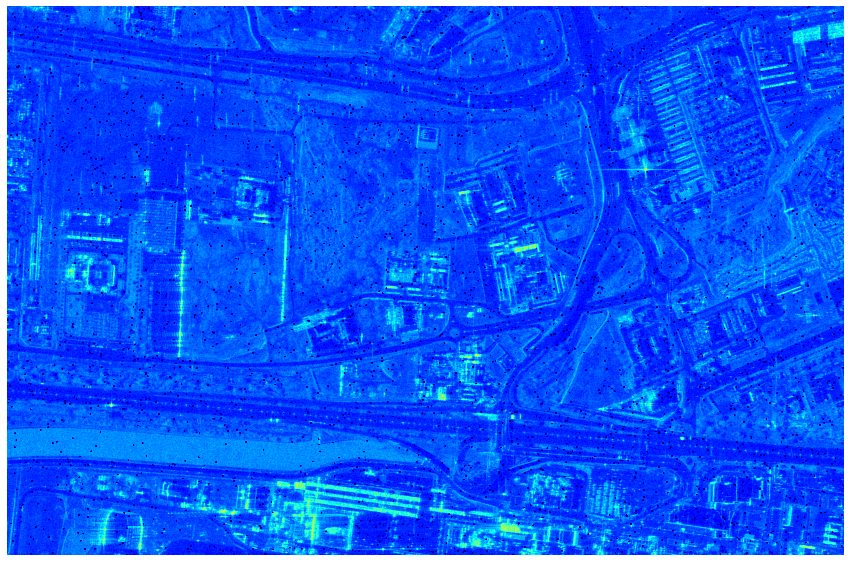

In [9]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 12)



# Plot the original image

plt.figure

plt.imshow(20 * np.log10(np.abs(s.T) / np.max(np.abs(s)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()

**Display the corrupted image**

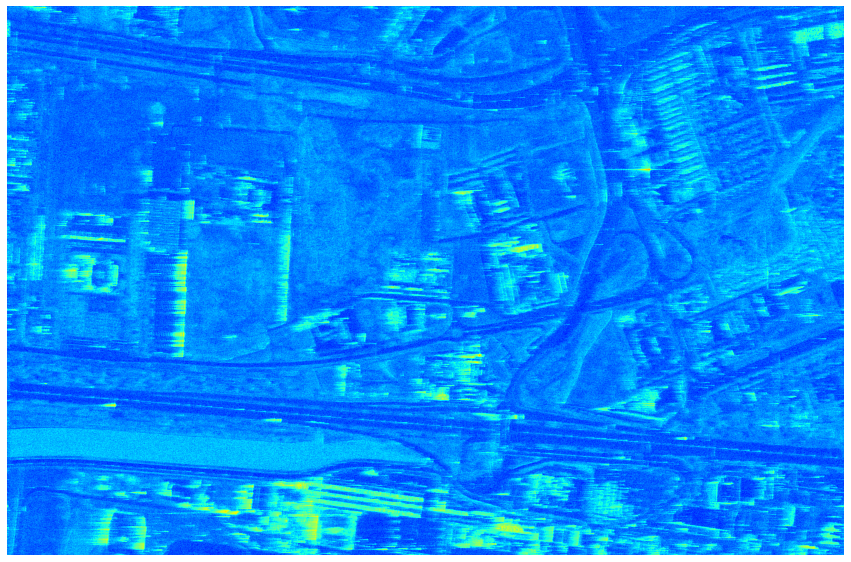

In [10]:
# Plot the corrupted image

plt.figure

plt.imshow(20 * np.log10(np.abs(s_e.T) / np.max(np.abs(s_e)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()

**Use center shift of bright targets. Then select range line and estimate window**

In [11]:
img = s.T

center_az_idx = np.ceil(ny/2)

for i in range(img.shape[0]):  
    
        maximum_along_az_idx = img[i,:].argmax()

        img[i,:] = np.roll(img[i,:], int(center_az_idx - maximum_along_az_idx))

# Use range line 461 with a span of +/50
ss = img[461,:]

ss[0:int(center_az_idx - 50)] = 0

ss[int(center_az_idx + 50):-1] = 0

point_target = ss

**Unwrap the phase of the point target and correct the image**

In [17]:
phase_error = np.unwrap(np.angle(np.fft.fft(point_target)));  
                    
phase_term = np.outer(np.exp(-1j * phase_error), np.ones(int(ny)))

s_ef = np.fft.fft(s_e, axis=0)
                 
s_c = np.fft.ifft(phase_term * s_ef, axis=0)

**Compare phase error**

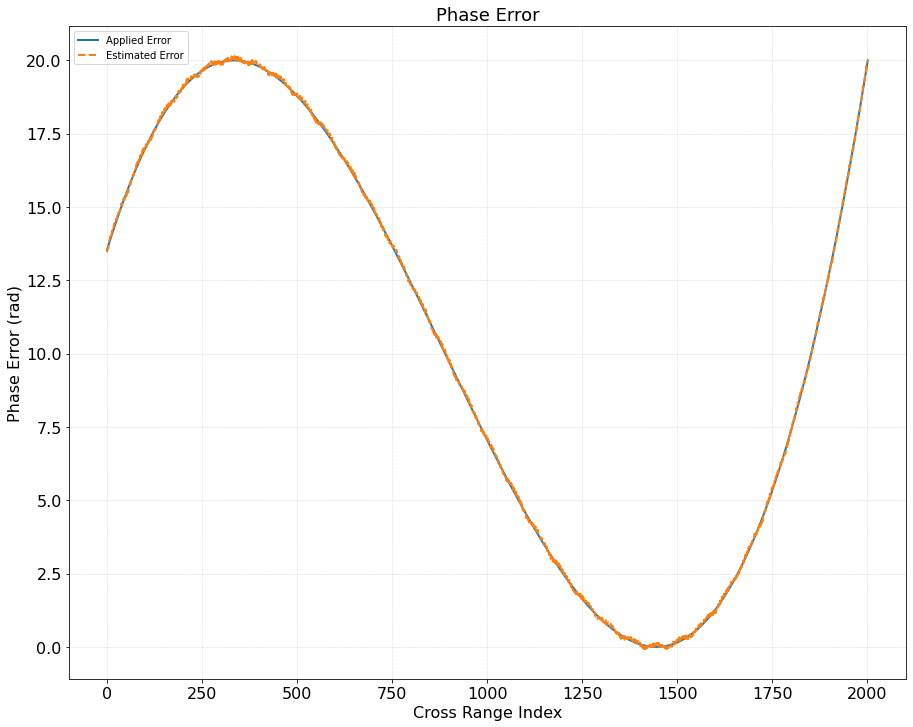

In [18]:
# Plot the phase error

plt.figure

plt.plot(phi, linewidth=2, label='Applied Error')

plt.plot(phase_error, linewidth=2, linestyle='--', label='Estimated Error')



# Set the plot title and labels

plt.title('Phase Error', size=18)

plt.xlabel('Cross Range Index', size=16)

plt.ylabel('Phase Error (rad)', size=16)



# Set the tick label size

plt.tick_params(labelsize=16)



# Turn on the grid

plt.grid(linestyle=':', linewidth=0.5)



# Display the legend

plt.legend(loc='best')



# Display the figure

plt.show()

**Display the corrected image**

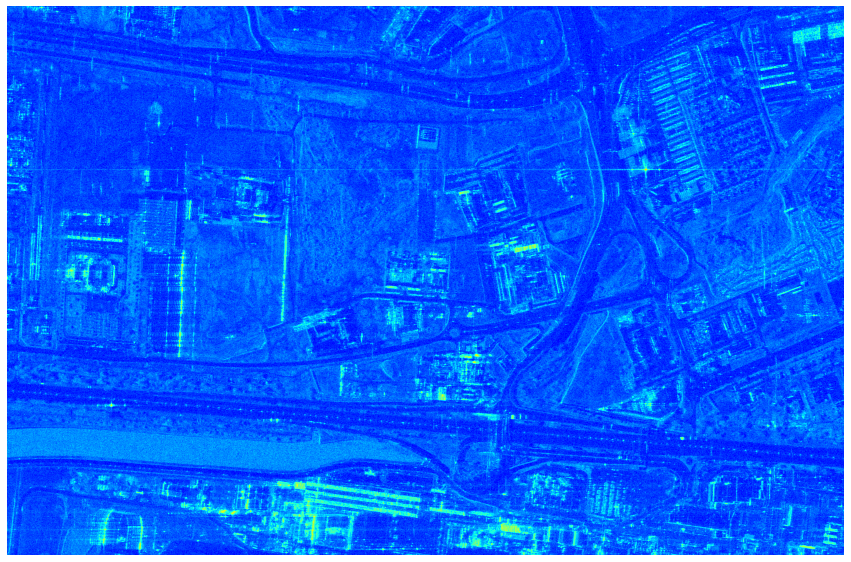

In [14]:
# Plot the corrected image

plt.figure

plt.imshow(20 * np.log10(np.abs(s_c.T) / np.max(np.abs(s_c)) + sys.float_info.min), cmap='jet', vmin=-abs(dynamic_range), vmax=0)



# Turn off the axis ticks

plt.axis('off')



# Make the axes match the image ratio

plt.gca().set_aspect(aspect=1/ratio, adjustable='box')



# Show the figure

plt.show()